# 토픽모델링 (LDA)
- 빅카인즈 뉴스기사 데이터 활용(https://www.bigkinds.or.kr/)

In [0]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 4.9MB/s 
     |████████████████████████████████| 174kB 51.1MB/s 
  Stored in directory: /root/.cache/pip/wheels/0e/2b/e8/c0b818ac4b3d35104d35e48cdc7afe27fc06ea277feed2831a
Successfully built JPype1


In [0]:
import konlpy
import numpy as np
import pandas as pd
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from konlpy.tag import Twitter

In [0]:
!wget https://bit.ly/2QA9xhg -O news_1500.xlsx

--2019-06-01 01:28:26--  https://bit.ly/2QA9xhg
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.dropbox.com/s/yj1gxuy0hkjwjpu/news_1500.xlsx [following]
--2019-06-01 01:28:26--  https://www.dropbox.com/s/yj1gxuy0hkjwjpu/news_1500.xlsx
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/yj1gxuy0hkjwjpu/news_1500.xlsx [following]
--2019-06-01 01:28:26--  https://www.dropbox.com/s/raw/yj1gxuy0hkjwjpu/news_1500.xlsx
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1792da3042e7882ca13c9f87ac.dl.dropboxusercontent.com/cd/0/inline/Ah9JJPbAjxbpN_THO6nqIjUGQWgZadaUfqgCOoBuj11MF-Zc

In [0]:
df_train = pd.read_excel('news_1500.xlsx', names=['기사'], delimiter='\t', keep_default_na=False)

#Countvectorizer적용을 위해 list로 변환
list_train = df_train['기사'].tolist()

In [0]:
len(list_train)

1499

In [0]:
list_train[:5]

['호주 브리즈번에서 발생한 한국인 워킹홀리데이 참가자 살해범이 같은 한국인 것으로 드라나 충격을 주고 있다. \n \n20일 호주 국영 ABC방송은 퀸즐랜드주 경찰이 김모(28)씨를 살해하고 암매장한 혐의로\xa0한국인 홍모(28)씨를\xa0체포했다고 보도했다. \n \n경찰에 따르면 홍씨는\xa0지난 16일 오후 브리즈번 캐넌힐에서 1만 5000 호주달러를 원화로 환전해줄 사..',
 '호주 경찰이 한국인 워킹홀리데이 참가자를 살해한 혐의로 또 다른 한국인 남성을 기소했다고 호주 언론이 보도했다. \n \n퀸즐랜드주 경찰은 20일(현지시간) 금품을 빼앗기 위해 김민태(28)씨를 살해한 혐의로 황모(28)씨를 기소했다고 시드니모닝헤럴드가 보도했다. \n \n그는 이날 브리즈번 법원에서 열린 심리에 출석해 기자들로부터 고개를 돌린 채 아래쪽만 쳐..',
 '\xa0 \n \n호주 괴물 가재가 공개돼 네티즌들의 폭발적인 관심을 끌고 있다. \n \n최근 각종 온라인 커뮤니티 게시판에는 ‘호주 괴물 가재’라는 제목의 사진 한 장이 게재됐다. \n \n공개된 사진에는 웬만한 성인 남성 팔 크기와 비슷한 가재의 모습이 담겨 있다. 사진 속 남성도 가재가 무거운지 엉거주춤한 자세를 취하고 있다. 호주에서 잡힌 것으로 알려진 가재의..',
 '최근 인기를 끌고 있는 tvN의 드라마 ‘응답하라 1994’가 같은 장면을 내보내고 다른 프로그램의 화면이 나오는 등 방송사고를 냈다. \n▶ 방송사고 이후 사과 자막이 나오는 tvN ‘응답하라 1994’의 한 장면.20일 밤 10시쯤 드라마 ‘응답하라 1994’가 방송되는 도중에 방송사고가 발생했다. 이날 방송에서 성나정이 호주로 떠났다가 한국으로 돌아..',
 '호주 워킹홀리데이 한국인 참가자가 19일 또다시 숨진 채 발견됐다. 지난달 호주에서 한국인 여대생이 무참히 살해된 지 한 달도 지나지 않아 발생한 이번 사건으로 호주 교민사회 및 어학연수 희망자들의 불안감이 커지고 있다. \n \n호주 ABC방송 등에 따르면 퀸즐랜드주 

In [0]:
twitter = Twitter()
results = []
for line in list_train:
    word_list = twitter.pos(line, norm=True, stem=True)
    words = []
    for word in word_list:
        if not word[1] in ["Josa", "eomi", "Punctuation", "Verb"]:
            words.append(word[0])
    words = (" ".join(words)).strip()
    results.append(words)

/usr/local/lib/python3.6/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [0]:
vect = CountVectorizer(max_features=10000, max_df=.10)
X = vect.fit_transform(results)

lda = LatentDirichletAllocation(n_components=10, learning_method="batch",
                                max_iter=25, random_state=0)

document_topics = lda.fit_transform(X)

In [0]:
lda.components_.shape

lda.components_.shape: (10, 10000)


In [0]:
# 토픽마다(components_의 행) 특성을 오름차순으로 정렬합니다
# 내림차순이 되도록 [:, ::-1] 사용해 행의 정렬을 반대로 바꿉니다
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]

# CountVectorizer 객체에서 특성 이름을 구합니다.
feature_names = np.array(vect.get_feature_names())

In [0]:
# 10개의 토픽을 출력합니다
%matplotlib inline
import matplotlib.pyplot as plt

def print_topics(topics, feature_names, sorting, topics_per_chunk=6, n_words=20):
    for i in range(0, len(topics), topics_per_chunk):
        # for each chunk:
        these_topics = topics[i: i + topics_per_chunk]
        # maybe we have less than topics_per_chunk left
        len_this_chunk = len(these_topics)
        # print topic headers
        print(("topic {:<8}" * len_this_chunk).format(*these_topics))
        print(("-------- {0:<5}" * len_this_chunk).format(""))
        # print top n_words frequent words
        for i in range(n_words):
            try:
                print(("{:<14}" * len_this_chunk).format(
                    *feature_names[sorting[these_topics, i]]))
            except:
                pass
        print("\n")
        
print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
박태환           보도            국제            리그            올림픽           
올림픽           필리핀           사드            포켓몬           경기            
수영            지역            발표            축구            대표팀           
출전            통해            개최            acl           예선            
리우            결과            내년            감독            대회            
국가대표          정부            독도            게임            시드니           
27            같다            평화            시즌            오후            
정부            발견            위성            해밍턴           2016          
선수            조사            소녀            지난해           출전            
대학            방송            기업            전북            리우            


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
축구  

In [0]:
# 100개 토픽 학습
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch",
                                   max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)

In [0]:
topics = np.array([7, 16, 24, 41, 45, 51, 54, 81, 89, 97])

In [0]:
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
print_topics(topics=topics, feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

topic 7       topic 16      topic 24      topic 41      topic 45      
--------      --------      --------      --------      --------      
엘니뇨           위해            사이트           태풍            리그            
피해자           남중국해          경쟁            이름            전북            
옥스팜           보도            이행            의미            축구            
보고서           페이스북          도박            손흥민           연맹            
2013          커플            수준            독일            acl           
트러블메이커        인도            포트            지역            챔피언스리그        
노예            합동            발표            매장            클래식           
wff           순찰            국가            물이            현대            
가장            이케아           등급            게시            서울            
항공            방송            서울대           말레이시아         시즌            


topic 51      topic 54      topic 81      topic 89      topic 97      
--------      --------      --------      --------      --------      
브라질 

In [0]:
# 골프 관련 토픽 89를 가중치로 정렬합니다
golf = np.argsort(document_topics100[:, 89])[::-1]
# 이 토픽이 가장 비중이 큰 문서 다섯개를 출력합니다
for i in golf[:2]:
    # 첫 두 문장을 출력합니다
    print(list_train[i], "\n")

세계유산도시 시장과 전문가들이 경북 경주에 총 집결했다. 
 
6일 경주시에 따르면 5일부터 7일까지 3일간 경주 하이코 등에서 ‘제2차 세계유산도시기구 아 태지역 총회’를 개최한다. 
 
이번 총회에는 일본 교토시를 비롯해 14개국 35여개 세계유산도시 시장단과 세계유산 전문가들이 대거 참가했다. 
 
또 세계유산도시기구(OWHC), 유네스코 방콕사무.. 

“오늘(8월8일) 이후 우리는 지구에 빚을 지게 된다.” 
 
자연에 치유 기간을 주지 않고 생태자원을 무분별하게 써버리면 지구는 점점 재생 능력을 잃고 황폐하게 된다. 국제환경단체 지구생태발자국네트워크(GFN)는 이 균형을 맞추기 위해 인간이 일년치 생태자원을 모두 써버린 날을 의미하는 ‘지구용량 초과의 날’(Earth Overshoot Day)을 매.. 



In [0]:
#한글 설치
!apt-get install fonts-nanum*
!apt-get install fontconfig
!fc-cache -fv
!cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
!rm -rf /content/.cache/matplotlib/*
matplotlib.font_manager._rebuild()


Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 6 not upgraded.
Need to get 37.0 MB of archives.
After this operation, 145 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum-eco all 1.000-6 [14.

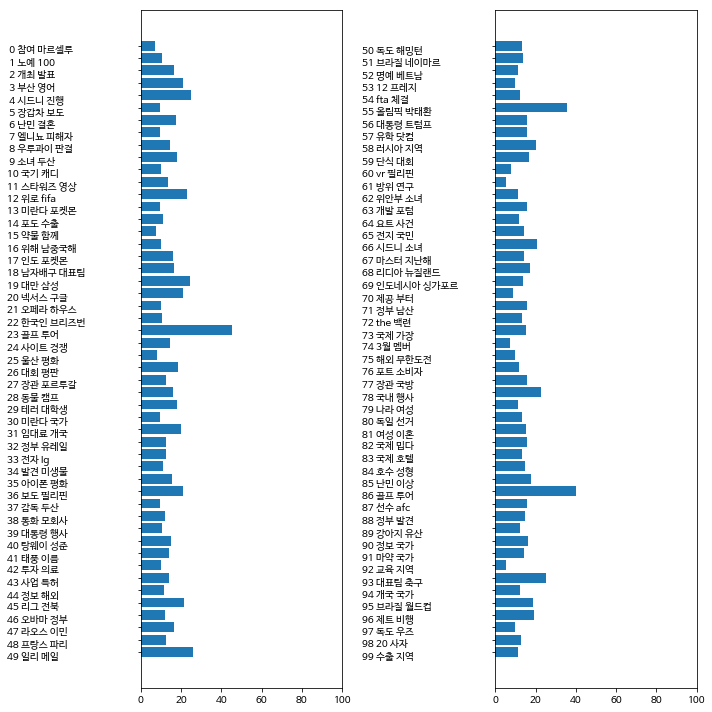

In [0]:
import platform
from matplotlib import font_manager, rc

import matplotlib.pyplot as plt
import matplotlib

if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')
else:
    print('system error...')

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]

# 두 개의 열이 있는 막대 그래프
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 100)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()